In [1]:
from tensorflow import keras                                        
from tensorflow.keras.models import Sequential                     
from tensorflow.keras.layers import Dropout                         
from tensorflow.keras.layers import Flatten                        
from tensorflow.keras.layers import Dense                           
from tensorflow.keras.layers import BatchNormalization              
from tensorflow.keras.layers import Conv2D                          
from tensorflow.keras.layers import MaxPool2D                       
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from datetime import datetime                                       
from tensorflow.keras.callbacks import ModelCheckpoint              

In [2]:
model = Sequential() 

In [3]:
from keras import backend as K 
if K.image_data_format()=='channels_first':
    input_shapes = (1,380,380)
else:
    input_shapes = (380,380,1)
    
print(K.image_data_format())   
print(input_shapes)

Using TensorFlow backend.


channels_last
(380, 380, 1)


In [4]:
model.add(Conv2D(8,(2,2),input_shape = input_shapes ,activation='relu')) 
model.add(BatchNormalization(axis=-1, center=True)) 
model.add(MaxPool2D(pool_size=(2, 2))) 
model.add(Dropout(rate=0.2))

model.add(Conv2D(16,(2,2),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32,(2,2),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64,(2,2),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128,(2,2),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(256,(2,2),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

model.add(Flatten()) 
model.add(Dense(1024, activation = 'relu')) 
model.add(Dense(1, activation = 'sigmoid')) 

model.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 379, 379, 8)       40        
_________________________________________________________________
batch_normalization (BatchNo (None, 379, 379, 8)       32        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 189, 189, 8)       0         
_________________________________________________________________
dropout (Dropout)            (None, 189, 189, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 188, 188, 16)      528       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 94, 94, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 93, 93, 32)        2

In [6]:
callbacks=ModelCheckpoint('brain01aa.h5',
                          monitor='val_accuracy',
                          verbose=1,
                          save_best_only=True,
                          save_weights_only=False,
                          mode='auto')

In [7]:
train_datagen=ImageDataGenerator(rescale=1./255)
val_datagen=ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('C:/Users/User1/Desktop/BT_Detection/train',
                                                   target_size = (380, 380),
                                                   batch_size = 32,
                                                   color_mode='grayscale',
                                                   class_mode = 'binary')

val_set = val_datagen.flow_from_directory('C:/Users/User1/Desktop/BT_Detection/val',
                                            target_size = (380, 380),
                                            batch_size = 32,
                                            color_mode='grayscale',
                                            class_mode = 'binary')

Found 1519 images belonging to 2 classes.
Found 320 images belonging to 2 classes.


In [25]:
time=datetime.now()
print('start time',time.hour,':',time.minute,':',time.second)

history=model.fit(x=training_set,epochs=50,validation_data=val_set, callbacks=[callbacks]) 

time=datetime.now()
print('end time',time.hour,':',time.minute,':',time.second)

start time 19 : 0 : 51
Train for 48 steps, validate for 10 steps
Epoch 1/50
47/48 [============================>.] - ETA: 5s - loss: 0.6885 - accuracy: 0.5319 
Epoch 00001: val_accuracy improved from -inf to 0.57187, saving model to brain01aa.h5
48/48 [==============================] - 262s 5s/step - loss: 0.6885 - accuracy: 0.5332 - val_loss: 0.6902 - val_accuracy: 0.5719
Epoch 2/50
47/48 [============================>.] - ETA: 4s - loss: 0.6565 - accuracy: 0.6516
Epoch 00002: val_accuracy did not improve from 0.57187
48/48 [==============================] - 214s 4s/step - loss: 0.6563 - accuracy: 0.6511 - val_loss: 0.6856 - val_accuracy: 0.5656
Epoch 3/50
47/48 [============================>.] - ETA: 4s - loss: 0.6280 - accuracy: 0.6658
Epoch 00003: val_accuracy improved from 0.57187 to 0.64062, saving model to brain01aa.h5
48/48 [==============================] - 200s 4s/step - loss: 0.6284 - accuracy: 0.6662 - val_loss: 0.6741 - val_accuracy: 0.6406
Epoch 4/50
47/48 [==============

Epoch 26/50
47/48 [============================>.] - ETA: 4s - loss: 0.1524 - accuracy: 0.9469
Epoch 00026: val_accuracy did not improve from 0.89688
48/48 [==============================] - 204s 4s/step - loss: 0.1529 - accuracy: 0.9460 - val_loss: 0.2285 - val_accuracy: 0.8906
Epoch 27/50
47/48 [============================>.] - ETA: 4s - loss: 0.1614 - accuracy: 0.9435
Epoch 00027: val_accuracy improved from 0.89688 to 0.90625, saving model to brain01aa.h5
48/48 [==============================] - 207s 4s/step - loss: 0.1605 - accuracy: 0.9440 - val_loss: 0.2306 - val_accuracy: 0.9062
Epoch 28/50
47/48 [============================>.] - ETA: 4s - loss: 0.1319 - accuracy: 0.9496
Epoch 00028: val_accuracy improved from 0.90625 to 0.91875, saving model to brain01aa.h5
48/48 [==============================] - 210s 4s/step - loss: 0.1301 - accuracy: 0.9506 - val_loss: 0.2193 - val_accuracy: 0.9187
Epoch 29/50
47/48 [============================>.] - ETA: 4s - loss: 0.1032 - accuracy: 0.97

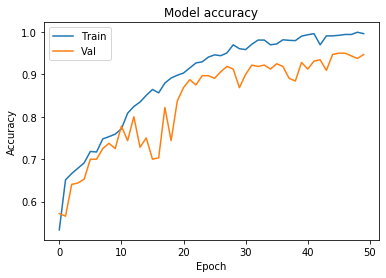

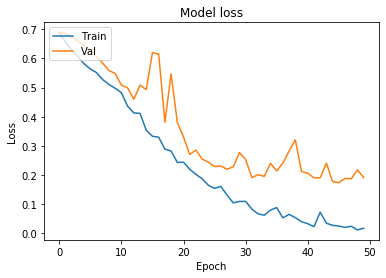

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [7]:
from PIL import Image
import numpy as np      
from skimage import transform
from tensorflow.keras.models import load_model
import cv2
import matplotlib.pyplot as plt
import os
from os.path import join
from os import listdir

In [4]:
model = load_model('brain01aa.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
import imutils
from PIL import ImageEnhance
import imageio

def background_cropping(image, plot=False):
    thresh = cv2.threshold(image, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)
   
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
   
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            
    return new_image

def load(filename):
    img0 = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)  
    cv2.namedWindow('Original Test Image',cv2.WINDOW_NORMAL)
    cv2.resizeWindow('Original Test Image',380,380)
    cv2.imshow('Original Test Image', img0)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    img1 = Image.open(filename).convert('L')  
    img2 = img1.resize((380, 380), Image.ANTIALIAS)
    img2.save("resized.jpg")
    img3 = cv2.imread("resized.jpg", cv2.IMREAD_GRAYSCALE)
    cv2.imshow('Resized/Grayscale', img3)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    img4 = cv2.imread("resized.jpg", cv2.IMREAD_GRAYSCALE)
    figure_size = 9  
    new_image_gauss = cv2.GaussianBlur(img4, (figure_size, figure_size), 0)
    img5 = Image.fromarray(new_image_gauss)
    img5.save("filter.jpg")
    cv2.imshow('Gaussian Filter', new_image_gauss)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    img6 = cv2.imread("filter.jpg", cv2.IMREAD_GRAYSCALE)
    crop_img = background_cropping(img6, True)
    resize_img = cv2.resize(crop_img, (380, 380))
    img7 = Image.fromarray(resize_img)
    img7.save("cropped.jpg")
    cv2.imshow('Cropped', resize_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    img8 = Image.open("cropped.jpg")
    enh_bri = ImageEnhance.Brightness(img8)
    brightness = 1.3
    image_brightened = enh_bri.enhance(brightness)
    enh_col = ImageEnhance.Color(image_brightened)
    color = 1.5
    image_colored = enh_col.enhance(color)
    enh_con = ImageEnhance.Contrast(image_colored)
    contrast = 1.3
    image_contrasted = enh_con.enhance(contrast)
    enh_sha = ImageEnhance.Sharpness(image_contrasted)
    sharpness = 3.0
    image_sharped = enh_sha.enhance(sharpness)
    image_sharped.save("enhanced1.jpg")
    img9 = cv2.imread("enhanced1.jpg", cv2.IMREAD_GRAYSCALE)
    cv2.imshow('Enhanced-1', img9)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    img10 = imageio.imread("enhanced1.jpg")
    img10 = img10 / 255.0
    im_power_law_transformation = cv2.pow(img10, 1.5)
    img11 = Image.fromarray(np.uint8(im_power_law_transformation * 255))
    img12 = img11.convert("L")
    img12.save("enhanced2.jpg")
    img13 = cv2.imread("enhanced2.jpg", cv2.IMREAD_GRAYSCALE)
    cv2.imshow('Enhanced-2', img13)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    np_image = Image.open("enhanced2.jpg")
    np_image = np.array(np_image).astype('float32') / 255
    np_image = transform.resize(np_image, (380, 380, 1))
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

In [14]:
image = load('C:/Users/User1/Desktop/BT_Detection/test/no/116.jpg')  
pred=model.predict(image)
if pred.item()>0.5:
    print('TUMOR!!')
else:
    print('NO TUMOR!!')
    
pred.item()

NO TUMOR!!


0.00017724755161907524

In [15]:
image = load('C:/Users/User1/Desktop/BT_Detection/test/yes/62.jpg')  
pred=model.predict(image)
if pred.item()>0.5:
    print('TUMOR!!')
else:
    print('NO TUMOR!!')
    
pred.item()

TUMOR!!


0.999728262424469

In [11]:
image_dir='C:/Users/User1/Desktop/BT_Detection/test/yes'
tumor=0
for root,dirs,files in os.walk(image_dir):
    for file in files:
        if file.endswith('jpg') or file.endswith('png'):
            path=os.path.join(root,file)
            image = load(path)
            pred=model.predict(image)
            if pred.item()>0.5:
                  tumor=tumor+1  
                
total1=len(listdir(image_dir))            

In [12]:
image_dir='C:/Users/User1/Desktop/BT_Detection/test/no'
non_tumor=0
for root,dirs,files in os.walk(image_dir):
    for file in files:
        if file.endswith('jpg') or file.endswith('png'):
            path=os.path.join(root,file)
            image = load(path)
            pred=model.predict(image)
            if pred.item()<0.5:
                non_tumor=non_tumor+1
                
total2=len(listdir(image_dir))

In [13]:
total=total1+total2
correct=tumor+non_tumor
perc=(correct*100)/total
print("Total test images=",total)
print("Correctly detected images=",correct)
print("Accuracy=",perc)

Total test images= 320
Correctly detected images= 315
Accuracy= 98.4375
